#Tugas 1 : Linear Regression

## Buat Constructor dan Inisialiasi Model

In [20]:
import numpy as np

In [21]:
class LinearRegression:
  def __init__(self,learning_rate=0.01,epoch=100):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.weight = None
    self.bias = None

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weight = np.zeros(n_features)
    self.bias = 0
    for i in range(self.epoch):
      for j in range(n_samples):
        y_pred = np.dot(X[j],self.weight) + self.bias
        d_w = (-2 * X[j] * (y[j] - y_pred))
        d_b = (-2 * (y[j] - y_pred))

        self.weight -= self.learning_rate * d_w
        self.bias -= self.learning_rate * d_b

  def predict(self,X):
    y_pred = np.dot(X,self.weight) + self.bias
    return y_pred
  
  def expand_feature(self,X,degree):
    X_expand = [X]
    for a in range(2,degree+1):
      # X_expand = np.hstack((X_expand,np.power(X,a)))
      X_expand.append(np.power(X,a))
    # return X_expand
    return np.column_stack(X_expand)

In [22]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

model = LinearRegression()

model.fit(X,y)

y_pred = model.predict(X)


## Menentukan Mse (Mean Squared Error)

### Menggunakan Fitur dan Target yang ada

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print(mse)

2919.116707637786


In [24]:
X_new = np.linspace(-0.15,0.2,100)
X_new = X_new.reshape(-1,10)
y_new = model.predict(X_new)

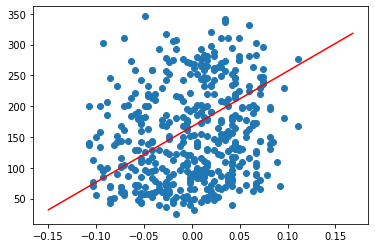

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y)
plt.plot(X_new[:,0],y_new,color='red')
plt.show()

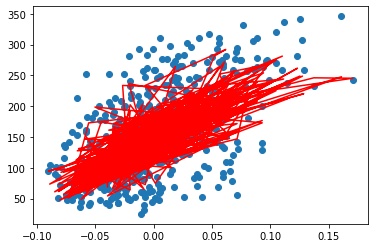

In [26]:
plt.scatter(X[:,2],y)
plt.plot(X[:,2],y_pred,color='red')
plt.show()

### Menggunakan Fitur dari Expand Fitur

In [27]:
X_expand = model.expand_feature(X[:,2],2)

model = LinearRegression()

model.fit(X_expand,y)

y_pred = model.predict(X_expand)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print(mse)
print(model.weight)


3947.813632905561
[808.22655409  23.83016222]


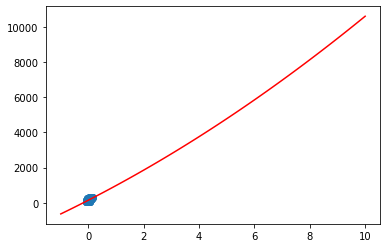

In [30]:
X_new = np.linspace(-1,10,100)

X_new = model.expand_feature(X_new,2)

y_new = model.predict(X_new)

plt.scatter(X[:,2],y)
plt.plot(X_new[:,0],y_new,'r-')
plt.show()

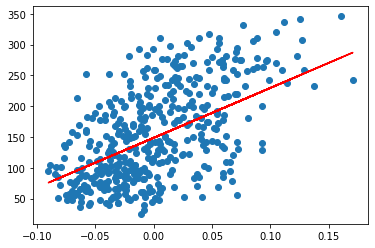

In [31]:
plt.scatter(X[:,2],y)
plt.plot(X[:,2],y_pred,color='red')
plt.show()